In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,RocCurveDisplay
from sklearn.preprocessing import label_binarize




In [142]:
df=pd.read_csv('train.csv')
dt=pd.read_csv('test.csv')

In [143]:
df.describe()

,ID,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,24326.761297,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,6.305703,79.624646,54.505159,35.399251
std,14038.295072,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.789991,5791.337827,3410.995424,2979.311817
min,1.000000,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,-99.000000,-99.000000,-99.000000,-99.000000
25%,12181.500000,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.647672,0.660015,0.668280,0.618118
50%,24300.000000,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,0.917700,0.869215,0.858840,0.816180
75%,36480.750000,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.434217,1.287025,1.258892,1.193870
max,48685.000000,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [144]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
df.replace(-99,np.nan,inplace=True) #La función replace() es un método de Pandas que permite reemplazar valores específicos en un DataFrame o en una Serie.
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
df.fillna(df.mean(),inplace=True) #es un método de Pandas que se utiliza para reemplazar los valores faltantes (NaN) en un DataFrame

In [145]:
#Observamos que las ultimas 4 columnas tienen valores invalidos lo que puede generar problemas al modelo de entrenamiento
#remplazamos cada valor referido a esto
dt.replace(-99,np.nan,inplace=True)
#Ademas puede haber valores faltantes por lo que completamos eñ codigo con estos valores tomando la mediana de cada columna
dt.fillna(dt.mean(),inplace=True)
#Repito lo de arriba pues si entreno testeo

In [146]:
df.set_index('ID',inplace=True)
dt.set_index('ID',inplace=True )

In [147]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,i3mag,Z3mag,Y3mag,J3mag,H3mag,K3mag,Yhlr,Jhlr,Hhlr,Khlr
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,19.761906,18.653363,18.347970,18.157934,17.918551,17.825652,18.869304,86.197919,55.909416,39.671741
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,1.452674,1.593221,1.491726,1.445090,1.369574,1.218845,1276.271768,5791.236452,3410.963825,2979.215445
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,14.761300,13.642800,13.425000,13.477500,13.198100,13.105300,0.341090,0.232720,0.272110,0.305210
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,18.748725,17.464400,17.226850,17.041725,16.863900,16.873950,0.768485,0.695113,0.676702,0.645580
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,19.796850,18.682700,18.401000,18.208550,17.979500,17.902300,1.071675,0.898475,0.865960,0.842090
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,20.993350,19.773800,19.433475,19.182475,18.844775,18.628375,1.805590,1.376307,1.279818,1.266598
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,24.570800,23.511900,22.461000,22.576200,24.343000,21.743800,134608.831100,668970.396270,427925.236530,435077.487900


In [148]:
#Ahora, como queremos que diferencie entre estrella, galaxia o cuasar, utilizamos las magnitudes
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df[f'{Bandas[i]}-{Bandas[i+1]}']=df[Bandas[i]]-df[Bandas[i+1]]
    dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df[Bandas_rad[i]]-df[Bandas_rad[i+1]]
    dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
#Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
#for i in range(len(Bandas_HLR)-1):
    #df[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]

In [149]:
df.describe()
#Observemos que la tabla cambio

,RAdeg,DEdeg,Hclass,umag,gmag,rmag,imag,zmag,Ymag,Jmag,...,Kmag-W1mag,W1mag-W2mag,u3mag-g3mag,g3mag-r3mag,r3mag-i3mag,i3mag-Z3mag,Z3mag-Y3mag,Y3mag-J3mag,J3mag-H3mag,H3mag-K3mag
count,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,...,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000,36514.000000
mean,157.413606,-0.926899,0.927316,21.326973,19.904223,18.887562,18.323593,18.201334,18.022149,17.879179,...,-0.318712,-0.409678,1.181943,0.837379,0.579192,1.108543,0.305392,0.190036,0.239383,0.092899
std,66.388946,2.411410,0.489506,2.345232,2.289705,2.024082,1.809982,1.721633,1.670744,1.618812,...,0.467479,0.336098,0.762176,0.544485,0.360998,0.470009,0.222361,0.175667,0.222105,0.282443
min,34.125470,-6.703610,0.000000,13.892700,12.227100,11.396600,10.969100,10.928600,11.072900,10.924400,...,-2.059400,-2.272900,-4.137500,-1.745600,-2.448200,-2.274000,-1.191600,-1.233000,-3.443400,-2.527300
25%,134.743538,-2.492215,1.000000,19.420125,18.024200,17.272875,16.900425,16.835100,16.690250,16.583500,...,-0.710300,-0.596100,0.697300,0.438425,0.354100,0.958100,0.209200,0.108425,0.148425,-0.067575
50%,181.789490,-0.412005,1.000000,21.274150,19.840850,18.795950,18.309800,18.234400,18.070100,17.925500,...,-0.450100,-0.455800,1.162950,0.828500,0.499200,1.304800,0.280500,0.228000,0.245600,0.173250
75%,209.603552,0.824670,1.000000,23.108600,21.820800,20.461875,19.658450,19.499125,19.253375,19.047475,...,0.028475,-0.333100,1.669500,1.298000,0.834600,1.427300,0.379600,0.292100,0.363200,0.287200
max,225.441880,3.021730,2.000000,33.162300,36.154200,25.110400,36.184800,23.480000,22.858900,22.670500,...,2.714100,1.706900,13.435700,6.398000,3.421800,3.270400,2.008600,1.601500,2.183100,3.882700


In [150]:
dt.describe()

,RAdeg,DEdeg,umag,gmag,rmag,imag,zmag,Ymag,Jmag,Hmag,...,Kmag-W1mag,W1mag-W2mag,u3mag-g3mag,g3mag-r3mag,r3mag-i3mag,i3mag-Z3mag,Z3mag-Y3mag,Y3mag-J3mag,J3mag-H3mag,H3mag-K3mag
count,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,...,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000,12172.000000
mean,156.613149,-0.941329,21.333312,19.913324,18.893525,18.327183,18.208126,18.026394,17.881192,17.659919,...,-0.314829,-0.413624,1.187901,0.841509,0.582453,1.103896,0.305605,0.192101,0.239469,0.096717
std,66.636595,2.417208,2.355041,2.302595,2.033262,1.810993,1.725643,1.675016,1.618450,1.549947,...,0.468328,0.337747,0.762926,0.543190,0.364288,0.472106,0.222214,0.176534,0.224497,0.282231
min,34.123260,-6.700990,13.861100,12.374600,11.549300,11.126800,11.208200,11.035000,10.942100,10.770100,...,-1.810300,-1.631200,-2.433900,-1.902400,-1.842800,-1.142600,-1.170800,-0.815300,-1.746000,-1.700100
25%,134.302335,-2.524500,19.424800,18.030150,17.282600,16.900775,16.844400,16.705425,16.596125,16.427375,...,-0.708700,-0.599500,0.706950,0.442800,0.353100,0.926650,0.208300,0.109975,0.147175,-0.061700
50%,181.503560,-0.412735,21.304150,19.871000,18.812250,18.338150,18.252150,18.078800,17.940700,17.737750,...,-0.443300,-0.456250,1.166050,0.826700,0.499450,1.298300,0.281600,0.228700,0.247450,0.177400
75%,208.548822,0.809577,23.142750,21.828300,20.471850,19.660875,19.498025,19.268400,19.047425,18.729200,...,0.031525,-0.331675,1.667475,1.303500,0.840700,1.424625,0.389225,0.294425,0.367200,0.289600
max,225.442140,3.019600,30.413400,36.653700,24.895600,23.483300,23.368500,22.731200,22.694700,22.810600,...,2.484700,1.502900,7.317300,3.536800,3.866000,3.071400,1.979400,2.281200,1.696400,2.481100


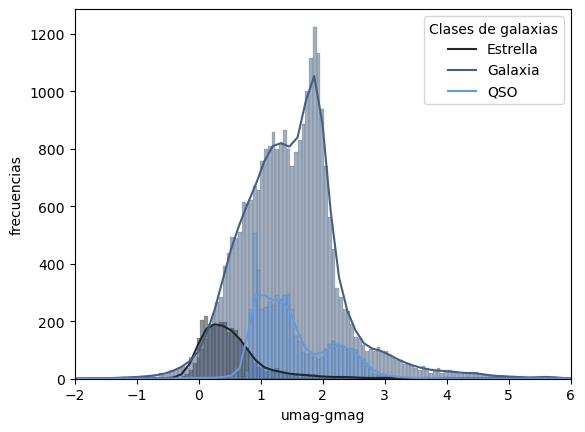

In [151]:
palette=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.histplot(df, x='umag-gmag', hue='Hclass', kde=True, palette=palette)  
plt.xlim(-2,6)
plt.ylabel('frecuencias')

plt.legend(title='Clases de galaxias', labels=['Estrella', 'Galaxia', 'QSO'])
plt.show()

In [152]:
df['Hclass'].value_counts()

Hclass
1    27572
0     5798
2     3144
Name: count, dtype: int64

In [153]:
#Tengo que definir mis feature, mis variables de entrada, estas son las que utilizamos para entrenar el modelo
#features = ['umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 
#            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 
#            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 
#            'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']
#Me quedo con mis mejores estimadores
features = [
            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 
            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag',
             'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']


In [154]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)
#Divide el conjunto de datos en entrenamiento (70%) y prueba (30%)

In [155]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']


In [156]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)


DecisionTreeClassifier()

In [157]:
y_pred=clf.predict(X_test)
#Realiza predicciones en los datos de prueba.

In [158]:
cm=confusion_matrix(y_test,y_pred) #Clase y prediccion, si la prediccion es buena deberia dar una diagonal
#Muestra la matriz de confusión para analizar errores.

In [159]:
print(classification_report(y_test,y_pred)) 
#MUestra para cada calse cual es la precision del ricall y el f1-score
#Hace promedio pesado
#La metrica que evalua la competencia es la media, promedio pesado
#Proporciona métricas detalladas como precisión, recall y F1-score para cada clase.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1722
           1       0.98      0.98      0.98      8303
           2       0.84      0.84      0.84       930

    accuracy                           0.97     10955
   macro avg       0.93      0.93      0.93     10955
weighted avg       0.97      0.97      0.97     10955



In [160]:
df_submit=pd.read_csv('test.csv')
df_submit.set_index('ID',inplace=True)

In [161]:
#color-color
#df_submit['umag-gmag'] = df_submit['umag'] - df_submit['gmag']
#df_submit['gmag-rmag'] = df_submit['gmag'] - df_submit['rmag']
#df_submit['rmag-imag'] = df_submit['rmag'] - df_submit['imag']
#df_submit['imag-zmag'] = df_submit['imag'] - df_submit['zmag']
#df_submit['zmag-Ymag'] = df_submit['zmag'] - df_submit['Ymag']
#df_submit['Ymag-Jmag'] = df_submit['Ymag'] - df_submit['Jmag']
#df_submit['Jmag-Hmag'] = df_submit['Jmag'] - df_submit['Hmag']
#df_submit['Hmag-Kmag'] = df_submit['Hmag'] - df_submit['Kmag']
#df_submit['Kmag-W1mag'] = df_submit['Kmag'] - df_submit['W1mag']
#df_submit['W1mag-W2mag'] = df_submit['W1mag'] - df_submit['W2mag']
##Magnitudes con radio de diafragma fijo
#df_submit['u3mag-g3mag'] = df_submit['u3mag'] - df_submit['g3mag']
#df_submit['g3mag-r3mag'] = df_submit['g3mag'] - df_submit['r3mag']
#df_submit['r3mag-i3mag'] = df_submit['r3mag'] - df_submit['i3mag']
#df_submit['i3mag-Z3mag'] = df_submit['i3mag'] - df_submit['Z3mag']
#df_submit['Z3mag-Y3mag'] = df_submit['Z3mag'] - df_submit['Y3mag']
#df_submit['Y3mag-J3mag'] = df_submit['Y3mag'] - df_submit['J3mag']
#df_submit['J3mag-H3mag'] = df_submit['J3mag'] - df_submit['H3mag']
#df_submit['H3mag-K3mag'] = df_submit['H3mag'] - df_submit['K3mag']
##Estas no me acuerdo como se llaman pero las agrego tambien
#df_submit['Yhlr-Jhlr'] = df_submit['Yhlr'] - df_submit['Jhlr']
#df_submit['Jhlr-Hhlr'] = df_submit['Jhlr'] - df_submit['Hhlr']
#df_submit['Hhlr-Khlr'] = df_submit['Hhlr'] - df_submit['Khlr']
Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df_submit[f'{Bandas[i]}-{Bandas[i+1]}']=df_submit[Bandas[i]]-df_submit[Bandas[i+1]]
    #dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df_submit[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df_submit[Bandas_rad[i]]-df_submit[Bandas_rad[i+1]]
    #dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
#Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
#for i in range(len(Bandas_HLR)-1):
    #df_submit[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df_submit[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]


In [162]:
df_submit = df_submit[features]


In [163]:
prediction= clf.predict(df_submit)

In [164]:
df_submit['Hclass']=prediction

In [165]:
print(df_tr.columns)  # Columnas usadas para el entrenamiento
print(df_submit.columns)  # Columnas del conjunto de predicción


Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag'],
      dtype='object')
Index(['umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag',
       'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 'Z3mag-Y3mag',
       'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag', 'Hclass'],
      dtype='object')


In [166]:
df_submit.loc[:,['Hclass']].to_csv('submission.csv',index=True) #Este es el que queremos subir a la competencia
#El besline es este
#En el publico subimos el porcentaje de conjunto de test
#Carga el conjunto de prueba final.
#Predice las clases utilizando el modelo entrenado.
#Guarda las predicciones en un archivo submission.csv para la competencia.

In [167]:
f1_score(y_test,y_pred,average='weighted')

0.9650998124959508

In [168]:
#Me dio horrible, vamos a probar RandomForest, le tengo fe

In [169]:
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)


In [170]:
#Ahora dividimos en clases de entrenamiento
X_train = df_tr[features]
y_train = df_tr['Hclass']

#lo mismo con el testeo
X_test=df_te[features]
y_test=df_te['Hclass']

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [171]:
model=RandomForestClassifier()

In [172]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [173]:
y_pred=model.predict(X_test)

In [174]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1693   25    4]
 [  13 8238   52]
 [   2  112  816]]


In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1722
           1       0.98      0.99      0.99      8303
           2       0.94      0.88      0.91       930

    accuracy                           0.98     10955
   macro avg       0.97      0.95      0.96     10955
weighted avg       0.98      0.98      0.98     10955



In [176]:
f1_score(y_test,y_pred,average='weighted')

0.9807951052970374

In [177]:
#Tengo que volver a preparar el conjunto submit
df_submit=pd.read_csv('test.csv')
df_submit.set_index('ID',inplace=True)

In [178]:

Bandas=['umag','gmag','rmag','imag','zmag','Ymag','Jmag','Hmag','Kmag','W1mag','W2mag'] #Estas solas magnitudes totales
#Elegimos en principio estas bandas 
#La función len() devuelve la cantidad de elementos en una lista
for i in range(len(Bandas)-1):
    df_submit[f'{Bandas[i]}-{Bandas[i+1]}']=df_submit[Bandas[i]]-df_submit[Bandas[i+1]]
    #dt[f'{Bandas[i]}-{Bandas[i+1]}']=dt[Bandas[i]]-dt[Bandas[i+1]]
Bandas_rad=['u3mag','g3mag','r3mag','i3mag','Z3mag','Y3mag','J3mag','H3mag','K3mag']
#Ahora en la misma linea de codigo, haremos lo mismo para las magnitudes a radio constante 3arcsecond
for i in range(len(Bandas_rad)-1):
    df_submit[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=df_submit[Bandas_rad[i]]-df_submit[Bandas_rad[i+1]]
    #dt[f'{Bandas_rad[i]}-{Bandas_rad[i+1]}']=dt[Bandas_rad[i]]-dt[Bandas_rad[i+1]]
Bandas_HLR=['Yhlr','Jhlr','Hhlr','Khlr']
for i in range(len(Bandas_HLR)-1):
    df_submit[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=df_submit[Bandas_HLR[i]]-df[Bandas_HLR[i+1]]
    #dt[f'{Bandas_HLR[i]}-{Bandas_HLR[i+1]}']=dt[Bandas_HLR[i]]-dt[Bandas_HLR[i+1]]

In [179]:
print(df_tr.columns)  # estas son las que uso para entrenar
print(df_submit.columns)  #Con esto imprimo las columnas del submir

Index(['RAdeg', 'DEdeg', 'Hclass', 'umag', 'gmag', 'rmag', 'imag', 'zmag',
       'Ymag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag',
       'r3mag', 'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr',
       'Jhlr', 'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag',
       'imag-zmag', 'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag',
       'Kmag-W1mag', 'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag',
       'r3mag-i3mag', 'i3mag-Z3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag',
       'J3mag-H3mag', 'H3mag-K3mag'],
      dtype='object')
Index(['RAdeg', 'DEdeg', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Ymag',
       'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'u3mag', 'g3mag', 'r3mag',
       'i3mag', 'Z3mag', 'Y3mag', 'J3mag', 'H3mag', 'K3mag', 'Yhlr', 'Jhlr',
       'Hhlr', 'Khlr', 'umag-gmag', 'gmag-rmag', 'rmag-imag', 'imag-zmag',
       'zmag-Ymag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'Kmag-W1mag',
       'W1mag-W2mag', 'u3mag-g3mag', 'g3mag-r3mag', 'r3mag-i3ma

In [180]:
df_submit = df_submit[features]


In [181]:
prediction=model.predict(df_submit)

In [182]:
df_submit['Hclass']=prediction

In [183]:
df_submit.loc[:,['Hclass']].to_csv('submission.csv',index=True) #Este es el que queremos subir a la competencia
#Ahora deberia andar, creo


In [184]:
#param_grid={
#    #'n_estimators':[50,100,150,200,300], #El número de árboles en el bosque. Aumentar este número puede mejorar el rendimiento, pero a costa de mayor tiempo de entrenamiento.
#    'max_depth':[3,5,10], #La profundidad máxima de los árboles. Limitar la profundidad puede evitar el sobreajuste
#    'min_samples_split':[2,5,10] #podriamos agregar esto ademas #El número mínimo de muestras requeridas para dividir un nodo.
#    }
param_grid = {
    'n_estimators': [250,300,400,450,500,550,600],
    'max_depth': [10, 15, 20],
    #'min_samples_split': [2],
    #'min_samples_leaf': [2],
}

In [185]:
#model=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='f1_weighted') 
#model=RandomizedSearchCV(RandomForestClassifier(),param_grid,n_iter=20,cv=5,scoring='f1_weighted',n_jobs=-1) 
model=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='f1_weighted',n_jobs=-1) 

#Realiza una búsqueda aleatoria de combinaciones de parámetros, lo que puede ser más eficiente cuando tienes muchos hiperparámetros.

In [ ]:
model.fit(X_train,y_train)


In [ ]:
model.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=400)

In [ ]:
model.best_params_

{'n_estimators': 400, 'max_depth': 15}

In [ ]:
model.best_score_


0.982839947416639

In [ ]:
y_pred=model.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.9796756006811365

In [ ]:
y_pred = model.predict(X_test) #métrica de evaluación que mide la proporción de predicciones correctas que realiza un modelo sobre el total de predicciones
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9799178457325423


el modelo tiene una tasa de aciertos del 98.22% en el conjunto de prueba.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1722
           1       0.98      0.99      0.99      8303
           2       0.94      0.87      0.90       930

    accuracy                           0.98     10955
   macro avg       0.97      0.95      0.96     10955
weighted avg       0.98      0.98      0.98     10955



Al modelo, le esta costando clasificar bien la clase 2, mientras que a la clase 0 y a la clase 1 la clasifica bien, observamos que la clase dos tiene menor precision, esa es la parte que se debe mejorar

In [ ]:
y_prob = model.predict_proba(X_test)

In [ ]:
model.best_estimator_.feature_importances_

array([0.04087394, 0.06547504, 0.08039994, 0.00540213, 0.0361791 ,
       0.08251239, 0.09152155, 0.06008078, 0.10034727, 0.06770479,
       0.04182579, 0.12242611, 0.20525116])

In [ ]:
print(features)

['umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag', 'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']


https://datatab.es/tutorial/roc-curve

In [ ]:
i=np.argsort(model.best_estimator_.feature_importances_)
for a in i:
    print(features[a],model.best_estimator_.feature_importances_[a])

Ymag-Jmag 0.005402128608180141
Jmag-Hmag 0.03617910284608173
umag-gmag 0.0408739446497571
Y3mag-J3mag 0.04182578766253032
g3mag-r3mag 0.0600807808568577
gmag-rmag 0.06547504073729897
Z3mag-Y3mag 0.06770478526020675
rmag-imag 0.08039994112056124
Hmag-Kmag 0.0825123904979543
W1mag-W2mag 0.09152155337310086
r3mag-i3mag 0.10034727027208898
J3mag-H3mag 0.1224261106771482
H3mag-K3mag 0.20525116343823369


In [ ]:
#Tengo que definir mis feature, mis variables de entrada, estas son las que utilizamos para entrenar el modelo
features = [
            'umag-gmag', 'gmag-rmag', 'rmag-imag', 'Ymag-Jmag', 'Jmag-Hmag', 
            'Hmag-Kmag', 'W1mag-W2mag', 'g3mag-r3mag', 'r3mag-i3mag',
             'Z3mag-Y3mag', 'Y3mag-J3mag', 'J3mag-H3mag', 'H3mag-K3mag']

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
df_tr, df_te=train_test_split(df,test_size=0.3,random_state=42)
X_train_normalize=normalize(X_train,'l1')
Y_train_normalize=normalize(y_train,'l1')

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train_normalize, y_train)

NameError: name 'train_test_split' is not defined

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
clf.predict(X_train)

array([1, 1, 1, ..., 1, 0, 1])